#**Image Segmentation Project:**
Pablo Paseiro NIA: 205247.

Raúl Cabrera NIA: 205918.

Jorge Bermejo NIA: 206993


#Implementations

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/DeepLearning_2020/FP/Images/'
results_path = '/content/drive/My Drive/DeepLearning_2020/FP/Dataset/SegmentationClass/'
import matplotlib.pyplot as plt
import torch
import numpy as np
from PIL import Image
from torchvision import models
import torchvision.transforms as T
import os
from random import randrange

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Decode Output

We will use the following function to convert 2D images to an RGB image where each label is mapped to its corresponding color.

In [2]:
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

##Load the Models

In [3]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


##Choose random image

In [4]:
def choose_random_image():
  j = randrange(5)+1
  k = randrange(8)
  return j,k

##Final Results

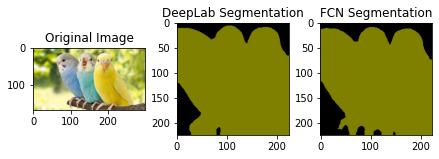

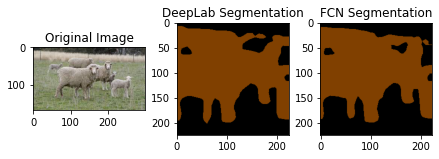

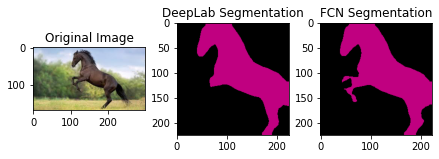

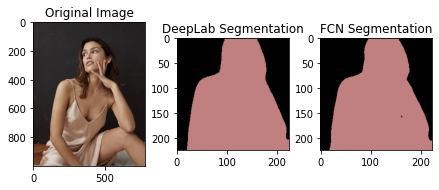

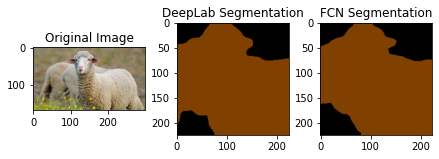

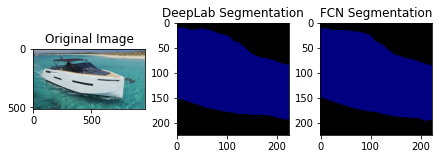

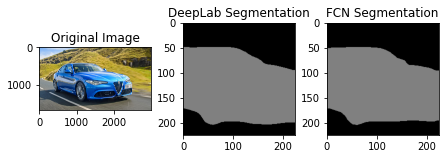

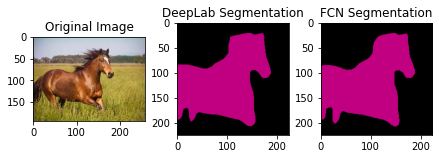

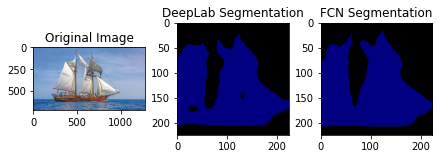

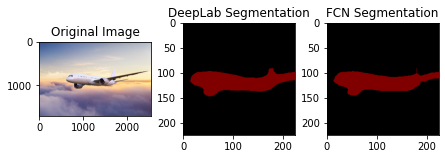

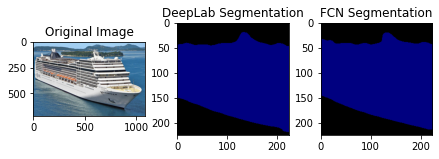

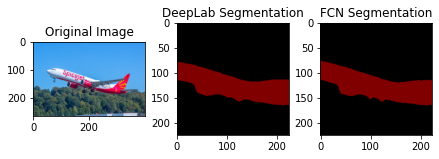

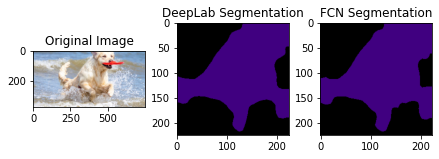

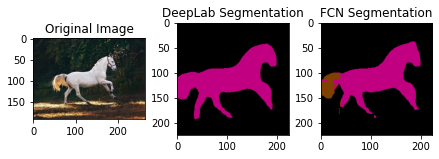

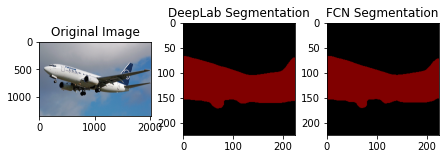

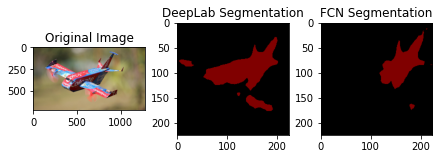

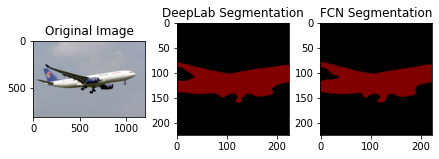

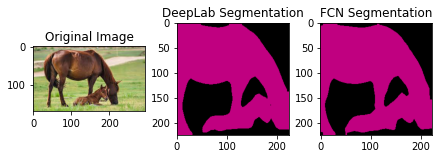

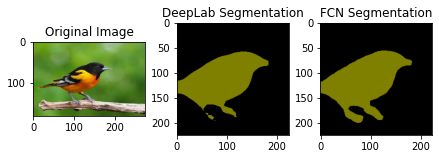

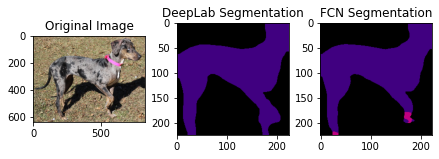

In [5]:
aux2 = []
for i in range(1,21):
  aux = ['a','b','bo','c','d','h','p','s']
  aux4 = 0
  while aux4 == 0:
    j,k = choose_random_image()
    aux3 = 10*j+k
    if aux3 not in aux2:
      aux2.append(10*j+k)
      aux4 +=1
  img = Image.open(data_path+str(aux[k])+str(j)+'.jpeg')
  trf = T.Compose([T.Resize(256),T.CenterCrop(224),T.ToTensor(), T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = dlab(inp)['out']
  out2 = fcn(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  om2 = torch.argmax(out2.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om) 
  rgb2 = decode_segmap(om2)

  fig, ax = plt.subplots(1,3)
  fig.tight_layout(pad=0.1)
  ax[0].title.set_text('Original Image');ax[0].imshow(img)
  ax[1].title.set_text('DeepLab Segmentation');ax[1].imshow(rgb)
  ax[2].title.set_text('FCN Segmentation');ax[2].imshow(rgb2)

##Model Size

Size of the FCN model with Resnet101 backbone is:       378.16 MB
Size of the DeepLabv3 model with Resnet101 backbone is: 403.67 MB


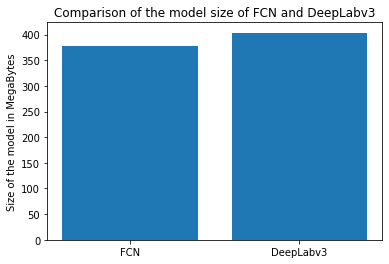

In [6]:
resnet101_size = os.path.getsize('/root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth')
fcn_size = os.path.getsize('/root/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth')
dlab_size = os.path.getsize('/root/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth')

fcn_total = fcn_size + resnet101_size
dlab_total = dlab_size + resnet101_size
    
print ('Size of the FCN model with Resnet101 backbone is:       {:.2f} MB'.format(fcn_total /  (1024 * 1024)))
print ('Size of the DeepLabv3 model with Resnet101 backbone is: {:.2f} MB'.format(dlab_total / (1024 * 1024)))

plt.bar([0, 1], [fcn_total / (1024 * 1024), dlab_total / (1024 * 1024)])
plt.ylabel('Size of the model in MegaBytes')
plt.xticks([0, 1], ['FCN', 'DeepLabv3'])
plt.title('Comparison of the model size of FCN and DeepLabv3')
plt.show()

##Inference Time

In [7]:
import time

def infer_time(net, path=data_path+'b1.jpeg', dev='cuda'):
  img = Image.open(path)
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  
  inp = trf(img).unsqueeze(0).to(dev)
  
  st = time.time()
  out1 = net.to(dev)(inp)
  et = time.time()
  
  return et - st

###On CPU

In [11]:
avg_over = 100

fcn_infer_time_list_cpu = [infer_time(fcn, dev='cpu') for _ in range(avg_over)]
fcn_infer_time_avg_cpu = sum(fcn_infer_time_list_cpu) / avg_over

dlab_infer_time_list_cpu = [infer_time(dlab, dev='cpu') for _ in range(avg_over)]
dlab_infer_time_avg_cpu = sum(dlab_infer_time_list_cpu) / avg_over


print ('Inference time for first few calls for FCN      : {}'.format(fcn_infer_time_list_cpu[:10]))
print ('Inference time for first few calls for DeepLabv3: {}'.format(dlab_infer_time_list_cpu[:10]))

print ('The Average Inference time on FCN is:     {:.2f}s'.format(fcn_infer_time_avg_cpu))
print ('The Average Inference time on DeepLab is: {:.2f}s'.format(dlab_infer_time_avg_cpu))

Inference time for first few calls for FCN      : [1.319687843322754, 0.9877276420593262, 0.966184139251709, 0.9725291728973389, 0.9702997207641602, 0.9803199768066406, 0.9762418270111084, 0.966667652130127, 1.0126144886016846, 1.0953524112701416]
Inference time for first few calls for DeepLabv3: [1.3534126281738281, 1.1592161655426025, 1.1530344486236572, 1.1767792701721191, 1.182058334350586, 1.1540722846984863, 1.1434135437011719, 1.1531322002410889, 1.1734468936920166, 1.1552166938781738]
The Average Inference time on FCN is:     0.98s
The Average Inference time on DeepLab is: 1.17s


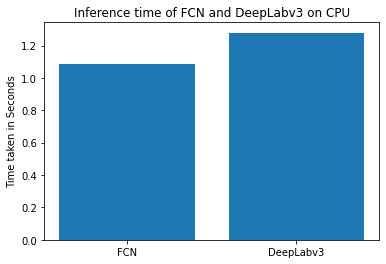

In [ ]:
plt.bar([0.1,0.2],[fcn_infer_time_avg_cpu,dlab_infer_time_avg_cpu],width=0.08)
plt.ylabel('Time taken in Seconds')
plt.xticks([0.1, 0.2], ['FCN', 'DeepLabv3'])
plt.title('Inference time of FCN and DeepLabv3 on CPU')
plt.show()

###On GPU
Remainder: Set your runtime to GPU

In [9]:
avg_over = 100

fcn_infer_time_list_gpu = [infer_time(fcn) for _ in range(avg_over)]
fcn_infer_time_avg_gpu = sum(fcn_infer_time_list_gpu) / avg_over

dlab_infer_time_list_gpu = [infer_time(dlab) for _ in range(avg_over)]
dlab_infer_time_avg_gpu = sum(dlab_infer_time_list_gpu) / avg_over

print ('Inference time for first few calls for FCN      : {}'.format(fcn_infer_time_list_gpu[:10]))
print ('Inference time for first few calls for DeepLabv3: {}'.format(dlab_infer_time_list_gpu[:10]))

print ('The Average Inference time on FCN is:     {:.3f}s'.format(fcn_infer_time_avg_gpu))
print ('The Average Inference time on DeepLab is: {:.3f}s'.format(dlab_infer_time_avg_gpu))

Inference time for first few calls for FCN      : [0.1505875587463379, 0.020508527755737305, 0.023282766342163086, 0.02063465118408203, 0.02036595344543457, 0.020870685577392578, 0.020354509353637695, 0.020612239837646484, 0.020415544509887695, 0.02203202247619629]
Inference time for first few calls for DeepLabv3: [0.26003122329711914, 0.023193359375, 0.02289867401123047, 0.022365808486938477, 0.027637004852294922, 0.020769357681274414, 0.017019987106323242, 0.016787290573120117, 0.016600370407104492, 0.01683187484741211]
The Average Inference time on FCN is:     0.019s
The Average Inference time on DeepLab is: 0.022s


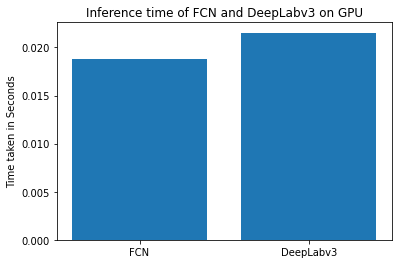

In [10]:
plt.bar([0.1, 0.2], [fcn_infer_time_avg_gpu, dlab_infer_time_avg_gpu], width=0.08)
plt.ylabel('Time taken in Seconds')
plt.xticks([0.1, 0.2], ['FCN', 'DeepLabv3'])
plt.title('Inference time of FCN and DeepLabv3 on GPU')
plt.show()